<a href="https://colab.research.google.com/github/kitamura-felipe/deeplearning_head_ct_demo/blob/master/Deep_Learning_Hands_on_v7_UNIFESP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DDI UNIFESP 2019

# Hands-on - Deep Learning para detectar hemorragia intracraniana



**Desenvolvido por:**

Felipe Campos Kitamura (kitamura.felipe@gmail.com)

Igor Santos (igorafael87@gmail.com)

Luciano Prevedello


**OBJETIVO:**

Demonstrar os passos básicos do treinamento de uma rede neural convolucional para detectar hemorragia intracraniana.


**Passo a passo:**

Todo o processo será realizado com a linguagem de programação Python, versão 3.

O dataset utilizado consiste em cerca de 100 imagens de tomografias de crânio normais e 100 imagens com sangramento intracraniano.

Para tarefas específicas importaremos bibliotecas específicas.

# Passo 1: criando o dataset

In [ ]:
#Primeiro vamos baixar o nosso dataset. Você pode baixar esse arquivo no seu computador para ver as imagens que utilizaremos nesse hands-on.
!wget https://github.com/igorafaelms/deeplearningddi/blob/master/Cranio.zip?raw=true

--2021-02-02 00:10:39--  https://github.com/igorafaelms/deeplearningddi/blob/master/Cranio.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/igorafaelms/deeplearningddi/raw/master/Cranio.zip [following]
--2021-02-02 00:10:39--  https://github.com/igorafaelms/deeplearningddi/raw/master/Cranio.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/igorafaelms/deeplearningddi/master/Cranio.zip [following]
--2021-02-02 00:10:39--  https://raw.githubusercontent.com/igorafaelms/deeplearningddi/master/Cranio.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent

In [ ]:
#@title Default title text
#Agora vamos extrair os arquivos de imagens de dentro desse arquivo .zip
!unzip Cranio.zip?raw=true -d /

Archive:  Cranio.zip?raw=true
  inflating: /Cranio/Hematoma/Captura de tela de 2016-11-16 23_58_04.png  
  inflating: /Cranio/Hematoma/Captura de tela de 2016-11-16 23_56_44.png  
  inflating: /Cranio/Hematoma/Captura de tela de 2016-11-16 23_57_36.png  
  inflating: /Cranio/Hematoma/Captura de tela de 2016-11-16 23_52_46.png  
  inflating: /Cranio/Hematoma/Captura de tela de 2016-11-16 23_49_49.png  
  inflating: /Cranio/Hematoma/Captura de tela de 2016-11-16 23_49_23.png  
  inflating: /Cranio/Hematoma/Captura de tela de 2016-11-16 23_50_32.png  
  inflating: /Cranio/Hematoma/Captura de tela de 2016-11-16 23_51_17.png  
  inflating: /Cranio/Hematoma/Captura de tela de 2016-11-16 23_59_30.png  
  inflating: /Cranio/Hematoma/Captura de tela de 2016-11-16 23_55_51.png  
  inflating: /Cranio/Hematoma/Captura de tela de 2016-11-16 23_52_57.png  
  inflating: /Cranio/Hematoma/Captura de tela de 2016-11-16 23_52_30.png  
  inflating: /Cranio/Hematoma/Captura de tela de 2016-11-16 23_54_08.p

In [ ]:
#Vamos garantir que os resultados entre os vários usuários sejam os mesmos:

from numpy.random import seed
seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)

PYTHONHASHSEED=0

In [ ]:
#Para abrir as imagens .jpg, utilizaremos o glob, que lista os arquivos que existem dentro de uma pasta

from glob import glob

#Para executar cada célula, pressione SHIFT + ENTER

In [ ]:
#Vamos definir o caminho das pastas que contém as imagens
hematoma_dir = '/Cranio/Hematoma/*.png'
normal_dir = '/Cranio/Normal/*.png'

#Agora vamos listar os arquvos dentro de cada uma das pastas, usando o glob()
hematoma_lista = glob(hematoma_dir)
normal_lista = glob(normal_dir)

#Para termos ideia do número de arquivos em cada pasta, vamos dar um print(len(lista)))
print('Número de casos com hematoma: ', len(hematoma_lista))
print('Número de casos sem hematoma: ', len(normal_lista))

#Execute esse código com SHIFT + ENTER

#A saída esperada é

#Número de casos com hematoma:  100
#Número de casos sem hematoma:  100

Número de casos com hematoma:  100
Número de casos sem hematoma:  100


In [ ]:
#Para ter ideia de como é a lista de arquivos gerada pelo glob, vamos olhar a variável hematoma_lista
hematoma_lista

#Execute esse código com SHIFT + ENTER

['/Cranio/Hematoma/Captura de tela de 2016-11-16 23_57_12.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 23_34_23.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 23_50_32.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 23_39_56.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 23_28_02.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 23_56_32.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 23_53_36.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 19_01_31.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 23_35_52.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 18_58_33.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 23_49_23.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 23_41_32.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 23_49_38.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 23_27_07.png',
 '/Cranio/Hematoma/Captura de tela de 2016-11-16 23_56_44.png',
 '/Cranio/Hematoma/Captura de tela de 20

**Como o computador enxerga uma imagem?**

Considere cada imagem como uma matriz em que o valor de cada pixel corresponde a um 
número que determina o tom de cinza da imagem.


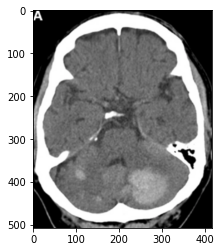

In [ ]:
#Podemos também ver cada uma das imagens do nosso dataset. Para isso, precisaremos abrir um aquivo .png e plotá-lo num gráfico.

#Para abrir o arquivo de imagem, utilizaremos o openCV, uma biblioteca aberta de visão computacional

import cv2

#Utilizaremos uma biblioteca de plotagem de gráficos chamada a matplotlib

from matplotlib import pyplot as plt

#Mãos a obra, vamos abrir um arquivo como exemplo:

ID_arquivo = 29

imagem = cv2.imread(hematoma_lista[ID_arquivo])

#Esse comando é só para ler o arquivo. Agora vamos criar uma figura com a imagem que abrimos (plotar a imagem):

plt.imshow(imagem)
plt.show()

#Execute esse código com SHIFT + ENTER

#Tente modificar ID_arquivo com outros números para vizualizar outras imagens. Repare no tamanho de cada imagem

In [ ]:
#Repare que cada imagem tem um tamanho diferente. 

#Como as redes neurais tem entrada de tamanho fixo, precisaremos redimensionar todas elas para um tamanho único.

#Além disso, precisamos informar explicitamente a qual das categorias as imagens pertecem em uma lista chamada labels (hematoma = 1, normal = 0)

#Faremos isso ao mesmo tempo que salvaremos as imagens numa matriz. Para usar matrizes, importaremos a NumPy.

# Por que usamos matrizes? A entrada de informações nas redes neurais se dá nesse formato,
# pois permite processamento computacional paralelo e maior velocidade de processamento.

import numpy as np

dataset = [] # cria uma lista vazia para incluir as imagens do dataset
labels = [] # cria uma lista vazia para incluir a categoria a qual cada imagem pertence (0 ou 1)

for arquivo in hematoma_lista: # para cada arquivo de imagem na lista hematoma:
    img = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE) #abre o arquivo como escala de cinzas e coloca a imagem na variável img
    img = cv2.resize(img, (256,256)) #redimensiona a imagem para 256 x 256 e salva na mesma variável img
    dataset.append(img) #adiciona essa imagem na lista do dataset e 
    labels.append(1) #informa que ela é um caso de hematoma (1)

#Agora faremos o mesmo para as imagens sem sangramento

for arquivo in normal_lista: # para cada arquivo de imagem na lista hematoma:
    img = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE) #abre o arquivo como escala de cinzas e coloca a imagem na variável img
    img = cv2.resize(img, (256,256)) #redimensiona a imagem para 256 x 256 e salva na mesma variável img
    dataset.append(img) #adiciona essa imagem na lista do dataset e 
    labels.append(0) #informa que ela é um caso normal (0)
    
dataset = np.asarray(dataset, dtype=np.float32) #transforma a lista de variáveis numa matriz
labels = np.asarray(labels)

for i in range(len(dataset)):
  dataset[i] = (dataset[i] - np.average(dataset[i], axis= (0, 1))) / np.std(dataset[i], axis= (0, 1))

#Vamos ver qual o tamanho dessa matriz 'dataset'

#Esperamos que a primeira dimensão dela seja de 200 (100 casos de hematoma e 100 normais)

#A segunda e a terceira dimensões devem ser 256.

#Execute esse código com SHIFT + ENTER
print(dataset.shape)

# a saída esperada é (200, 256, 256)

# Colocar exemplo de uma matriz

(200, 256, 256)


# Passo 2: criando a estrutura da rede neural convolucional

Uma convolução é uma operação matemátca que consiste em multiplicar uma matriz (a nossa imagem) por um 
filtro (matrix de pesos)


In [ ]:
#Para criar a rede neural convolucional, utilizaremos o Keras, que é uma biblioteca para Deep Learning em Python

#Inicialmente vamos importar as funções do Keras que iremos utilizar:

from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Concatenate, add
from keras.callbacks import ModelCheckpoint
from keras.layers import Activation, Dense, LeakyReLU
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

#Agora criaremos a estrutura da rede neural convolucional

#Essa é a definição da camada de entrada da rede
#Lembra que a nossa matriz com todas as imagens de cada categoria tem o formato (200, 256, 256)?
#Nesse caso a entrada (input) da rede é cada imagem individualmente
#Ou seja, uma imagem de tamanho 256 x 256 pixels e 1 canal de cor (escala de cinzas)

imgs = Input(shape=(256,256,1))

#Abaixo temos a primeira camada Convolucional


x = Conv2D(16, 3, padding='same', activation='relu')(imgs)

#Em seguida, adicionamos uma camada MaxPool, que irá reduzir em 75% o tamanho da saída da camada convolucional.
#Fazemos isso para evitar que o número de parâmetros da rede aumente demais.
#Não se preocupe em entender o detalhe de cada uma dessas operações. Tente captar a ideia geral.
x = MaxPool2D()(x)

#Adicionaremos mais camadas convolucionais, seguidas de MaxPool

x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = Dropout(0.25)(x)
x = MaxPool2D()(x)
x = Conv2D(16, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(10, 3, padding='same', activation='relu')(x)
#x = MaxPool2D()(x)
#x = Conv2D(10, 3, padding='same', activation='relu')(x)
#x = MaxPool2D()(x)
#x = Conv2D(12, 3, padding='same', activation='relu')(x)
#x = Conv2D(12, 3, padding='same', activation='relu')(x)
#x = Conv2D(12, 3, padding='same', activation='relu')(x)
x = GlobalAveragePooling2D()(x)

#Finalmente adicionaremos duas camadas densas, ou 'Fully Connected Layers'.
#Essas camadas são redes neurais convencionais, sem convolução.
#Não se preocupe com o porquê de usarmos essa camada agora.
x = Dense(32, activation='relu')(x)

#Dropout é uma maneira de reduzir overfitting.
x = Dropout(0.3)(x)

#Definiremos agora a entrada e a saída da rede
#A função Dense tem o argumento "1" pois a saída da rede é a classificação hematoma x não-hematoma
#Ou seja, a saída da rede é apenas um número (0 ou 1)

x = Dense(16, activation='relu')(x)

outputs = Dense(1, activation='sigmoid')(x)

inputs = imgs

#Por fim, definimos a rede

Rede_DDI = Model(inputs=inputs, outputs=outputs)

#Agora, definiremos o método de otimização da rede: ADAM, com a taxa de aprendizado e de decaimento
#Cada um desses parâmetros é ajustável.

custom_adam = optimizers.Adam(lr=0.0009, decay=0.0002)

#Compila o modelo
Rede_DDI.compile(loss='binary_crossentropy', optimizer=custom_adam, metrics=['acc'])

#Execute esse código com SHIFT + ENTER

# Passo 3: Dividindo o dataset nos grupos Treinamento/Validação/Teste

In [ ]:
#Vamos separar nosso dataset em grupos de treinamento, validação e test. Para isso, usaremos a biblioteca sklearn.

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#Divide treino, validação e teste na proporção 80%/10%/10%

dataset_train, dataset_test, labels_train, labels_test = train_test_split(dataset[:,...,np.newaxis], labels[:,...,np.newaxis], test_size=0.1, random_state=88)
dataset_train, dataset_val, labels_train, labels_val = train_test_split(dataset_train, labels_train, test_size=0.11, random_state=88)

#Mostra o tamanho das variáveis dos grupos

print('(Número de imagens, Imagem_X, Imagem_Y, canais de cor) (Número de labels, 1)')
print(dataset_train.shape, labels_train.shape)
print(dataset_val.shape, labels_val.shape)
print(dataset_test.shape, labels_test.shape)

#Você deve ver a seguinte saída:

#(160, 256, 256, 1) (160,1)
#(20, 256, 256, 1) (20,1)
#(20, 256, 256, 1) (20,1)

#Execute esse código com SHIFT + ENTER

(Número de imagens, Imagem_X, Imagem_Y, canais de cor) (Número de labels, 1)
(160, 256, 256, 1) (160, 1)
(20, 256, 256, 1) (20, 1)
(20, 256, 256, 1) (20, 1)


# Passo 4: como treinar a sua rede neural

Durante o treinamento da rede, os pesos das sinapses de todas as camadas são atualizados.

Após a conclusão do treinamento, cada filtro representará uma característica de imagem a ser procurada nas imagens do nosso dataset.

Treinando a Rede_DDI:


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70
8/8 [==============================] - 9s 113ms/step - loss: 0.6959 - acc: 0.5013 - val_loss: 0.6929 - val_acc: 0.4500

Epoch 00001: val_loss improved from inf to 0.69292, saving model to Melhor_modelo.hdf5
Epoch 2/70
8/8 [==============================] - 1s 89ms/step - loss: 0.6937 - acc: 0.5651 - val_loss: 0.6926 - val_acc: 0.5500

Epoch 00002: val_loss improved from 0.69292 to 0.69261, saving model to Melhor_modelo.hdf5
Epoch 3/70
8/8 [==============================] - 1s 93ms/step - loss: 0.6928 - acc: 0.4986 - val_loss: 0.6923 - val_acc: 0.5500

Epoch 00003: val_loss improved from 0.69261 to 0.69227, saving model to Melhor_modelo.hdf5
Epoch 4/70
8/8 [==============================] - 1s 109ms/step - loss: 0.6913 - acc: 0.5530 - val_loss: 0.6911 - val_acc: 0.5500

Epoch 00004: val_loss improved from 0.69227 to 0.69108, saving model to Melhor_modelo.hdf5
Epoch 5/70
8/8 [==============================] - 1s 95ms/step - loss: 0.6914 - acc: 0.5410 - val_loss: 0.6899 - val_a

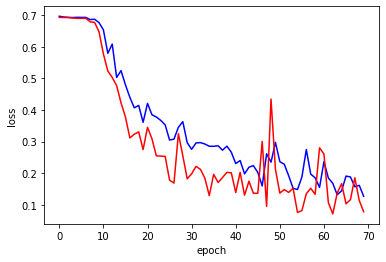

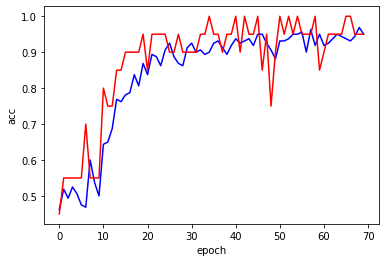

Treino finalizado.


In [ ]:
#Hora de treinar a nossa rede neural.

#Primeiro vamos definir para salvar o melhor modelo que for encontrado durante o treino

checkpointer = ModelCheckpoint(filepath='Melhor_modelo.hdf5', monitor='val_loss',
                               verbose=1, save_best_only=True)

#Muito bem, chegou a hora mais esperada, vamos treinar a nossa rede com o dataset que criamos

print('Treinando a Rede_DDI:')


datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True)

#datagen.fit(dataset_train)
  


#Definimos o treinamento com o dataset de treino, realizando validação no dataset de validação.
#O treinamento não usa o dataset de teste

Valida = (dataset_val, labels_val)

hist = Rede_DDI.fit_generator(datagen.flow(dataset_train, labels_train, batch_size=20), steps_per_epoch=1*len(dataset_train) / 20, epochs=70, 
                    validation_data= (dataset_val, labels_val), 
                    callbacks=[checkpointer])

#Por fim, plotamos os resultados de evolução da medida de erro (loss) ao longo das épocas

plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


plt.plot(hist.history['acc'], 'b-', label='train accuracy')
plt.plot(hist.history['val_acc'], 'r-', label='val accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()

del(Rede_DDI)
print('Treino finalizado.')

#Execute esse código com SHIFT + ENTER

# Passo 5: avaliando sua rede no conjunto de Teste

Neste passo, iremos apresentar todo o dataset de treino para o modelo que criamos, de forma a calcular a acurácia da nossa rede neural no grupo de treino

In [ ]:
#Vamos importar a biblioteca do keras que abre modelos salvos previamente
from keras.models import load_model

#Agora abrimos o melhor modelo que geramos anteriormente

melhor_modelo = load_model('Melhor_modelo.hdf5')

#Execute esse código com SHIFT + ENTER

In [ ]:
#Usamos a função evaluate para avaliar a acurácia do nosso modelo no grupo de teste
print('Acurácia no grupo de teste: ', melhor_modelo.evaluate(dataset_test, labels_test, verbose=0)[1])

#Execute esse código com SHIFT + ENTER

Acurácia no grupo de teste:  1.0


**Podemos ver a predição caso a caso**



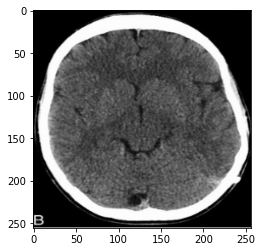

Classe: normal
Predição: normal
Tempo médio de predição:
10 loops, best of 3: 27.4 ms per loop


In [ ]:
#Agora vemos fazer a inferência em imagens individuais do nosso dataset de teste.

#Defina uma imagem no grupo de Teste, de 0 a 19:

ID_imagem = 17

#Agora vamos criar uma figura com a imagem escolhemos

plt.imshow(np.squeeze(dataset_test[ID_imagem]), cmap='gray')
plt.show()

#Vamos mostrar a qual classe ela pertence

print('Classe:', 'normal' if labels_test[ID_imagem]==0 else 'hematoma')

predicao = np.round(melhor_modelo.predict(dataset_test[ID_imagem][np.newaxis,:,...], verbose=0))==0

print('Predição:', 'normal' if predicao else 'hematoma')

#Calcula o tempo médio de predição
print('Tempo médio de predição:')
%timeit melhor_modelo.predict(dataset_test[ID_imagem][np.newaxis,:,...], verbose=0)

#Execute esse código com SHIFT + ENTER

In [ ]:
#Vamos calcular as predictions do dataset de teste
labels_pred = melhor_modelo.predict(dataset_test)>0.5  #predictions abaixo de 0.5 são consideradas como 0 (normal); e acima de 0.5 são consideradas como label 1 (hematoma)



In [ ]:
#Função para desenhar matriz de confusão
#Retirada de https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Ground-truth label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

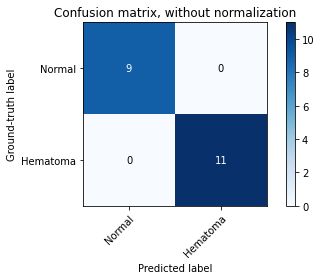

In [ ]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(labels_test, labels_pred.astype('int'), classes=['Normal','Hematoma'],
                      title='Confusion matrix, without normalization')

No handles with labels found to put in legend.


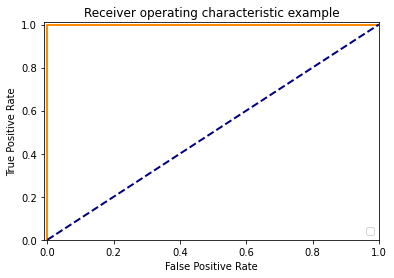

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(labels_test, labels_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()